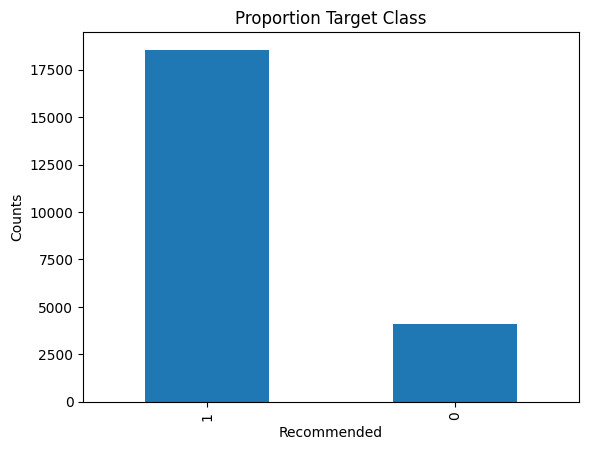

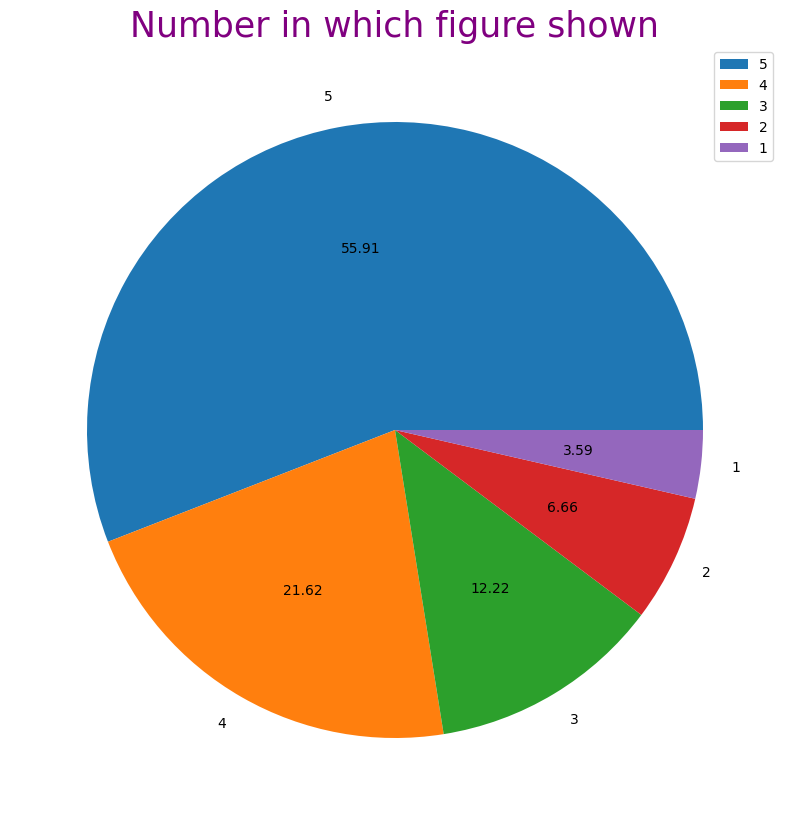

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


[nltk_data] Downloading package stopwords to C:\Users\Prasad
[nltk_data]     Shree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import string
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


df=pd.read_csv('A:/Csv_files/Womens Clothing E-Commerce Reviews.csv/Womens_Clothing_E-Commerce_Reviews.csv')
"""
df.head()
df.tail()
df.shape
df.describe
df.columns

df.info()
df.dtypes
df.isnull().sum()
df.sample(5)
"""
df.duplicated().sum()
df.describe()
#df.drop_duplicates(inplace=True)
#df.info()
#check null value percent
#(df.isna().sum()/df.shape[0])*100
df.isna().sum()
df['Review Text'][1]
review=df[['Review Text', 'Recommended IND']]
review.head()

#columns rename
review=review.rename(columns={"Recommended IND": "Recommended","Review Text":"Review"})
review.head()

review.isnull().sum()
review.dropna(subset=['Review'], inplace=True)
review['Review']=review['Review'].astype(str)
review.shape
review['Recommended'].value_counts()
review['Recommended'].value_counts().plot(kind='bar')
plt.xlabel('Recommended')
plt.ylabel('Counts')
plt.title('Proportion Target Class')

df.isnull()
plt.figure(figsize=(10,10))
ax=df.Rating.value_counts()
labels=df['Rating'].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("Number in which figure shown",fontsize=25,color='purple')
plt.legend()
plt.show()
"""
#teju=df.cov()
#teju

sns.heatmap(teju,annot=True)

plt.figure(figsize=(10,10))
ax=df.Rating.value_counts()[:10]
ax.plot(kind='bar')

sns.distplot(df.Rating, color = 'red')
"""
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()                   
    return " ".join(text)

review['Review_clear'] = review['Review'].apply(tokens)
review.head()

review['Review_clear'] = review['Review_clear'].astype(str)

import nltk
nltk.download('stopwords')

# Show some stop words
stop_words = stopwords.words('english')
print(stop_words[::10])